In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
train_df = pd.read_csv('../data/iwslt/train.csv')
train_df.dropna(inplace=True)

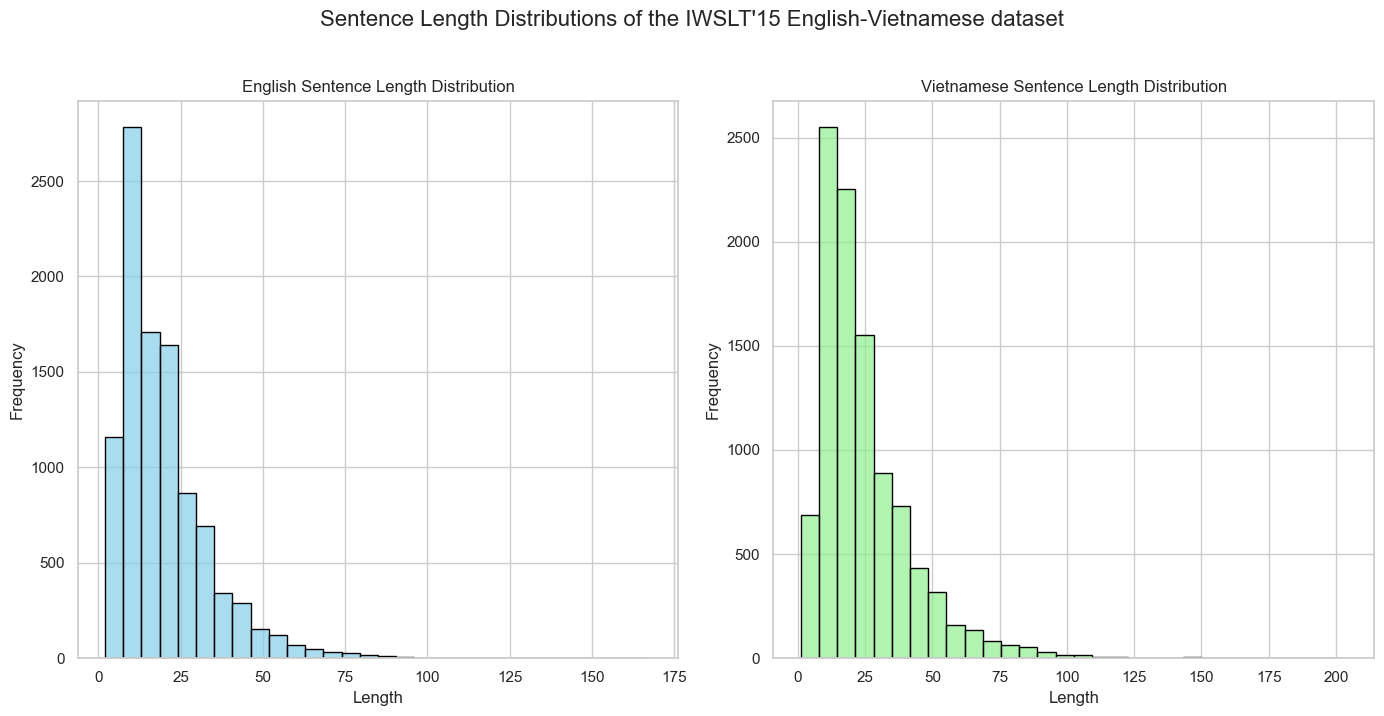

In [4]:
train_df['en_len'] = train_df['en'].apply(lambda x: len(x.split()))
train_df['vi_len'] = train_df['vi'].apply(lambda x: len(x.split()))

# Set the style
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))

# English Sentence Length Distribution
plt.subplot(1, 2, 1)
sns.histplot(train_df['en_len'], bins=30, kde=False, color="skyblue", alpha=0.7, edgecolor="black")
plt.title('English Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Vietnamese Sentence Length Distribution
plt.subplot(1, 2, 2)
sns.histplot(train_df['vi_len'], bins=30, kde=False, color="lightgreen", alpha=0.7, edgecolor="black")
plt.title('Vietnamese Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.suptitle("Sentence Length Distributions of the IWSLT'15 English-Vietnamese dataset", fontsize=16, y=1.02)

plt.tight_layout()
plt.savefig('sentence_length_distribution_iwslt.png')
plt.show()

In [10]:
dev_df =  pd.read_csv('../data/sts_b/dev.tsv', sep='\t', on_bad_lines='skip').dropna()
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      732 non-null    int64  
 1   genre      732 non-null    object 
 2   filename   732 non-null    object 
 3   year       732 non-null    object 
 4   old_index  732 non-null    int64  
 5   source1    732 non-null    object 
 6   source2    732 non-null    object 
 7   sentence1  732 non-null    object 
 8   sentence2  732 non-null    object 
 9   score      732 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 57.3+ KB


In [6]:
shuffled_df = dev_df.sample(frac=1, random_state=42)

# Assuming dev_df is already loaded as per the provided code
half_len = len(dev_df) // 2  # Calculate the midpoint to split the DataFrame

# Split the DataFrame into two equal parts
dev_df_first_half = dev_df.iloc[:half_len]
dev_df_second_half = dev_df.iloc[half_len:]

In [7]:
dev_df_second_half.to_csv('../data/sts_b/dev.tsv', sep='\t', index=False)

In [11]:
dev_df_first_half.to_csv('../data/sts_b/test2.tsv', sep='\t', index=False)

In [ ]:
!